In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)
import matplotlib.pyplot as plt

In [ ]:
user_ratings = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None )
print(user_ratings)

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]


There's a column you need to remove because it doesn't contain ratings. Check the description of the dataset and figure out which one. Then drop it.

In [ ]:
#dropping first column
user_ratings.drop(columns=[0],axis=1, inplace=True)

Check the dataset description to figure out which value you should replace with NaNs (the cells for which we don't have a rating). This is the test set.

In [ ]:
user_ratings= user_ratings.replace(99.00, np.NaN)
user_ratings.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


 Use pandas to find the best- and the worst-rated jokes

In [ ]:
mean_rating = user_ratings.mean(axis=0)

In [ ]:
mean_rating

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [ ]:
(pd.DataFrame(mean_rating)).nlargest(10,0)

,0
50,3.665085
89,3.574720
36,3.312500
27,3.189821
32,3.155988
35,3.006351
62,2.976021
29,2.972455
53,2.939463
49,2.771298


In [ ]:
#Quiz attempt
user_ratings.iloc[5621, 17]


-6.84

Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your **validation set**. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

In [ ]:
arr = user_ratings.values
print(arr.shape)

(24983, 100)


In [ ]:
rated = np.where(~np.isnan(arr))
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  #~np.isnan(a)
  new_data = orig.copy()
  rated = np.where(~np.isnan(arr))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

In [ ]:
new_arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [ ]:
arr[idx[0][0], idx[1][0]]

-0.92

In [ ]:
 new_arr[idx[0][0], idx[1][0]]

99.0

In [ ]:
n_latent_factors = 2

#user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((arr.shape[0], n_latent_factors))
latent_item_features = np.random.random((arr.shape[1], n_latent_factors))

In [ ]:
latent_user_preferences

array([[0.741, 0.219],
       [0.633, 0.974],
       [0.044, 0.792],
       ...,
       [0.053, 0.563],
       [0.613, 0.812],
       [0.555, 0.169]])

In [ ]:
latent_item_features

array([[4.349e-01, 5.091e-01],
       [2.418e-01, 9.277e-01],
       [6.426e-01, 2.424e-01],
       [1.591e-01, 3.130e-02],
       [3.146e-01, 2.073e-01],
       [2.980e-01, 2.541e-01],
       [8.414e-01, 7.015e-02],
       [7.493e-01, 9.110e-01],
       [3.869e-05, 2.404e-01],
       [6.545e-01, 2.911e-01],
       [3.875e-01, 2.684e-01],
       [3.627e-01, 9.089e-01],
       [7.855e-01, 8.991e-01],
       [5.338e-01, 8.206e-01],
       [3.082e-01, 7.060e-01],
       [5.290e-01, 1.065e-01],
       [3.523e-01, 9.732e-01],
       [5.862e-01, 7.609e-01],
       [1.735e-01, 1.096e-02],
       [4.249e-01, 6.885e-02],
       [6.438e-01, 7.429e-01],
       [6.719e-01, 5.114e-01],
       [7.921e-01, 2.930e-02],
       [1.582e-01, 9.853e-01],
       [6.301e-01, 1.169e-01],
       [3.720e-01, 6.389e-01],
       [7.543e-01, 2.416e-01],
       [6.612e-01, 7.903e-01],
       [4.720e-01, 5.573e-01],
       [4.893e-01, 9.728e-01],
       [4.102e-01, 2.165e-01],
       [5.492e-02, 2.488e-01],
       [

In [ ]:
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = arr[user_id, item_id]
                if (~np.isnan(rating)) and rating!=99 :
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=26.130854
Iteration 10/100:	MSE=23.060461
Iteration 20/100:	MSE=21.246840
Iteration 30/100:	MSE=19.846316
Iteration 40/100:	MSE=17.752863
Iteration 50/100:	MSE=17.263549
Iteration 60/100:	MSE=17.168864
Iteration 70/100:	MSE=17.141832
Iteration 80/100:	MSE=17.133417
Iteration 90/100:	MSE=17.130919


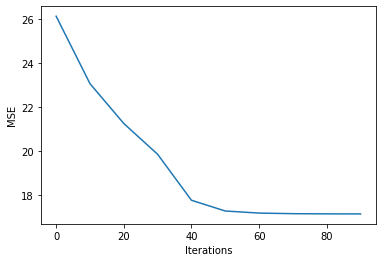

In [ ]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.912, -4.18 , -5.64 , ..., -2.443, -6.19 , -2.565],
       [ 2.989,  3.157,  3.791, ...,  2.511,  3.95 ,  2.756],
       [ 6.841,  7.136,  7.423, ...,  7.307,  7.155,  8.238],
       ...,
       [-0.996, -1.059, -1.366, ..., -0.709, -1.471, -0.76 ],
       [-1.957, -2.1  , -2.945, ..., -1.068, -3.282, -1.093],
       [ 2.784,  2.867,  2.517, ...,  3.598,  2.155,  4.125]])

In [ ]:
values = [zip(arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = user_ratings.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.9115602977881605)","(8.79, -4.1804020798964565)","(-9.66, -5.640388375963934)","(-8.16, -9.543766119985559)","(-7.52, -2.6896472952131507)","(-8.5, -1.7721365468226629)","(-9.85, -4.938317842007135)","(4.17, -4.3290007309167695)","(-8.98, -8.838749264684717)","(-4.76, -3.728192398954043)","(-8.5, -1.6033456323056863)","(-6.75, -1.7454491796040836)","(-7.18, -6.510236371705237)","(8.45, -1.5717085650340386)","(-7.18, -6.570194342818377)","(-7.52, -10.026152693316416)","(-7.43, -4.465058151399886)","(-9.81, -5.3123586441267925)","(-9.85, -3.843181400912687)","(-9.85, -6.1353524256254275)","(-9.37, 0.40748177458951257)","(1.5, -4.3101675980914695)","(-4.37, -6.098384659062243)","(-9.81, -10.559157622640612)","(-8.5, -4.646459791907197)","(1.12, -1.5754644058882394)","(7.82, 3.4179794877164067)","(2.86, -1.6947728863792233)","(9.13, 3.4801832104930193)","(-7.43, -7.9240674816205585)","(2.14, 1.106255919389695)","(-4.08, 3.216699319806164)","(-9.08, -9.430411793368403)","(7.82, -2.6996458425193732)","(5.05, 2.8344242485434754)","(4.95, 3.668978661130743)","(-9.17, -9.133550839901744)","(-8.4, -3.4710040549549355)","(-8.4, -2.51470339332393)","(-8.4, -3.680354935958724)",...,"(8.59, 1.2036686287258058)","(3.59, 2.09356222286804)","(-6.84, -5.4055788443808375)","(-9.03, -8.324848853819331)","(2.82, 1.3397554717313374)","(-1.36, 1.5143501525640828)","(-9.08, -8.802178756593262)","(8.3, 1.731134278303408)","(5.68, 1.753638001071476)","(-4.81, -4.67452771262453)","(nan, -6.7795247631561555)","(nan, 1.1701930144841348)","(nan, -3.3647403937755302)","(nan, -9.205781193069324)","(nan, -6.041769456877431)","(nan, 0.5548206796027487)","(nan, -4.211171367579913)","(-9.42, -2.2592468921812325)","(nan, -5.3634797956155245)","(nan, -2.68523459773971)","(nan, -1.3270242034456499)","(-7.72, -4.634927314368634)","(nan, -0.3461430721953571)","(nan, -4.81770894586067)","(nan, -4.156178189232226)","(nan, -6.255277562760022)","(nan, -1.1355419753288376)","(nan, -1.2652615672112126)","(nan, 3.1809758074791286)","(nan, -5.3126017366841705)","(2.82, -1.4989428555438558)","(nan, -3.198981285060146)","(nan, 0.23381641953664292)","(nan, -4.730240621241611)","(nan, -3.941534546104924)","(nan, -2.8775034296459427)","(-5.63, -2.1805272943254286)","(nan, -2.4425611247306653)","(nan, -6.18997958141222)","(nan, -2.5647133433337417)"
1,"(4.08, 2.988704201068605)","(-0.29, 3.15675525832858)","(6.36, 3.7911127980075197)","(4.37, 5.264165067663115)","(-2.38, 2.2213243597097514)","(-9.66, 2.52842385767351)","(-0.73, 2.982638801109464)","(-5.34, 2.330764585603885)","(8.88, 5.069378936825496)","(9.22, 2.998598760806607)","(6.75, 2.400886313663262)","(8.64, 2.5775144313578133)","(4.42, 3.150446729899459)","(7.43, 2.4931448404809093)","(4.56, 3.0221069308066166)","(-0.97, 4.318524766073285)","(4.66, 2.460312241665172)","(-0.68, 2.957829294984918)","(3.3, 2.737084074534656)","(-1.21, 3.58932536565345)","(0.87, 1.641640666349381)","(8.64, 3.4960275764742184)","(8.35, 4.020578192957584)","(9.17, 5.507599320141292)","(0.05, 3.5467186903740036)","(7.57, 2.4414865180200174)","(4.71, 0.25635504382266683)","(0.87, 2.4089307126312214)","(-0.39, 0.14114584992780854)","(6.99, 4.868130529028798)","(6.5, 1.26768038744575)","(-0.92, 0.34929794077315907)","(7.14, 5.209387344459906)","(9.03, 2.782400758468163)","(-1.8, 0.5470668878864201)","(0.73, 0.0672555100386199)","(7.09, 4.852856867917232)","(3.4, 3.0765281045661586)","(-0.87, 2.802577076407056)","(7.91, 3.229970658591162)",...,"(-6.7, 1.3211407366393582)","(-3.35, 0.90531375132496)","(-9.03, 3.7930600468010116)","(4.47, 4.719119999870447)","(4.08, 1.1706473506259751)","(-3.83, 1.0927998032719537)","(8.74, 4.95083564458494)","(1.12, 0.9649887529856921)","(0.78, 1.032211247208102)","(7.52

Code for Movie dataset: [https://github.com/bb20417/CE888/blob/main/lab4/my_recommender_movie.ipynb](https://github.com/bb20417/CE888/blob/main/lab4/my_recommender_movie.ipynb)